## <span style="color:#2F749F;"><strong>📦 Sesión práctica 2: Análisis Univariado, bivariado y multivariado</strong></span>
---
<p align="right">
  <a href="https://colab.research.google.com/#create=true" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/>
  </a>
</p>


## <span style="color:black;"><strong>Datos del estudiante</strong></span>

In [ ]:
nombre = input("📝 Ingresa tu nombre completo: ")
correo = input("📧 Ingresa tu correo electrónico: ")
cedula = input("🔢 Ingresa los últimos 4 dígitos de tu cédula: ")

📝 Ingresa tu nombre completo: Emmanuel Bustamante Valbuena
📧 Ingresa tu correo electrónico: emmanuel.bustamante@udea.edu.co
🔢 Ingresa los últimos 4 dígitos de tu cédula: 8117


## <span style="color:black;"><strong>Parte 1: Análisis Univariado</strong></span>

### <span style="color:#2F749F;"><strong>Ejercicio 1: Cálculo de medidas de tendencia central</strong></span>

A partir de una muestra simulada de ingresos, calcula la **media, mediana y moda**, y luego a interpretarlas.

1. Usa el número base `528310` (debes reemplazarlo con los últimos 6 dígitos de tu documento de identificación).  
2. Con este número genera una semilla (`np.random.seed`) para que los resultados sean reproducibles.  
3. Los ingresos se simulan con una distribución normal:  
   - Media teórica: `(base % 10) + 2`  
   - Desviación estándar: `2`  
   - Tamaño de muestra: `30`  
4. Los valores negativos se reemplazan por cero (pues los ingresos no pueden ser negativos).  
5. Grafica tus resultados (ver imagen de ejemplo)

<p align="center">
    <img src="imgs\sp_2_e1.png" alt="sp_2_e1" width="900"  height="400">
</p>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


base = 118117
np.random.seed(base)

ingresos = np.random.normal(loc=base % 10 + 2, scale=2, size=30).round(0)

ingresos = np.clip(ingresos,0,None)
#ingresos = np.where(ingresos < 0, 0, ingresos)
# Medidas de tendencia central
media = np.mean(ingresos)
mediana = np.median(ingresos)
moda = stats.mode(ingresos, keepdims=True)[0][0]

print("Media:", media)
print("Mediana:", mediana)
print("Moda:", moda)



Media: 9.633333333333333
Mediana: 10.0
Moda: 10.0


In [2]:
sns.set_style("whitegrid", {'axes.grid': False}) # Fondo blanco, sin rejilla por defecto
plt.style.use('seaborn-v0_8-talk') # Un estilo con fuentes más grandes y legibles

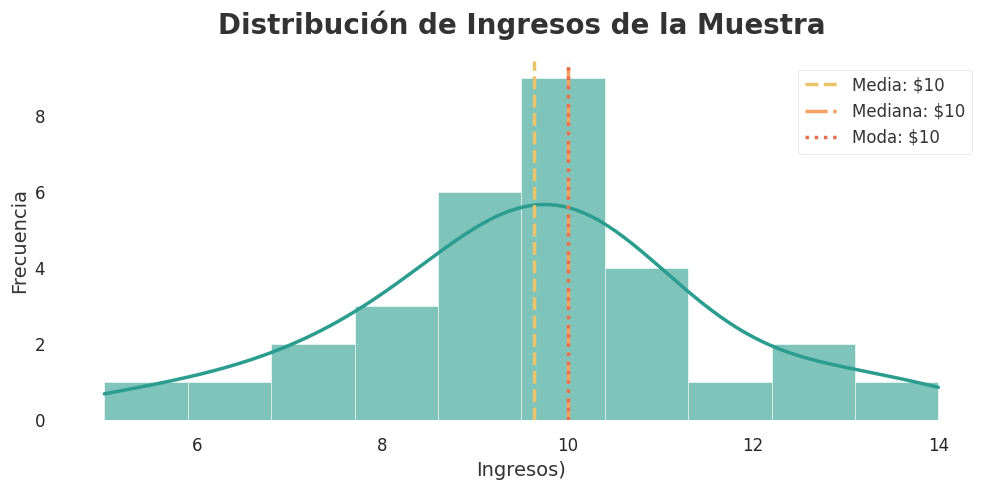

In [3]:
# Visualización
plt.figure(figsize=(10, 5))

# Paleta de colores profesional
color_principal = "#2a9d8f"
color_kde = "#264653"
color_media = "#e9c46a"
color_mediana = "#f4a261"
color_moda = "#e76f51"
color_texto = "#333333"
# Graficar el histograma y la línea de densidad (KDE)
sns.histplot(ingresos, bins=10, kde=True, color=color_principal,
             line_kws={'linewidth': 2.5, 'color': color_kde},
             alpha=0.6) # alpha controla la transparencia de las barras

# Añadir líneas verticales para la media y la mediana con estilo mejorado
plt.axvline(x=media, color=color_media, linestyle="--", linewidth=2.5, label=f"Media: ${media:,.0f}")
plt.axvline(x=mediana, color=color_mediana, linestyle="-.", linewidth=2.5, label=f"Mediana: ${mediana:,.0f}")
plt.axvline(x=moda, color=color_moda, linestyle=":", linewidth=2.5, label=f"Moda: ${moda:,.0f}")

# Mejorar etiquetas, título y leyenda
plt.title("Distribución de Ingresos de la Muestra", fontsize=20, fontweight='bold', pad=20, color=color_texto)
plt.xlabel("Ingresos)", fontsize=14, color=color_texto)
plt.ylabel("Frecuencia", fontsize=14, color=color_texto)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Personalizar la leyenda
legend = plt.legend(fontsize=12, frameon=True, facecolor='white', framealpha=0.8)
for text in legend.get_texts():
    plt.setp(text, color=color_texto)

# Añadir un toque final
sns.despine(left=True, bottom=True) # Elimina los bordes superior y derecho del gráfico
plt.tight_layout() # Ajusta el gráfico para que todo encaje sin solaparse

# Mostrar el gráfico
plt.show()


### <span style="color:#2F749F;"><strong>Ejercicio 2: Cálculo de medidas de dispersión</strong></span>

A partir de la muestra generada en el Ejercicio 1, analiza qué tan dispersos están los datos respecto a su media. Calcula:
1. Rango
2. Varianza
3. Desviación estándar
4. Coeficiente de variación
5. Genera una gráfica con los resultados obtenidos (ver imagen de ejemplo)

<p align="center">
    <img src="imgs\sp_2_e2.png" alt="sp_2_e2" width="900"  height="400">
</p>

In [4]:

minimo = np.min(ingresos)
maximo = np.max(ingresos)
rango = maximo - minimo
varianza = np.var(ingresos, ddof=1)
desviacion = np.std(ingresos, ddof=1)
coef_var = desviacion / media

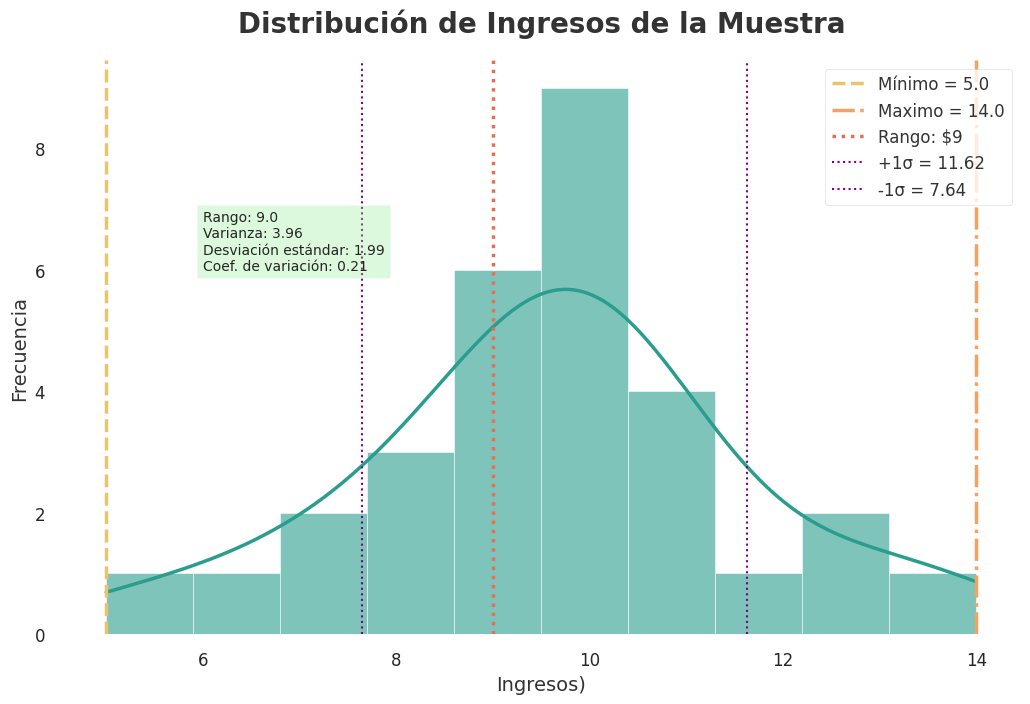

In [5]:
# Añadir líneas verticales para la media y la mediana con estilo mejorado
sns.histplot(ingresos, bins=10, kde=True, color=color_principal,
             line_kws={'linewidth': 2.5, 'color': color_kde},
             alpha=0.6) # alpha controla la transparencia de las barras
plt.axvline(x=minimo, color=color_media, linestyle="--", linewidth=2.5, label=f'Mínimo = {minimo}')
plt.axvline(x=maximo, color=color_mediana, linestyle="-.", linewidth=2.5, label=f'Maximo = {maximo}')
plt.axvline(x=rango, color=color_moda, linestyle=":", linewidth=2.5, label=f"Rango: ${rango:,.0f}")
plt.axvline(media + desviacion, color='purple', linestyle=':', linewidth=1.5, label=f'+1σ = {media + desviacion:.2f}')
plt.axvline(media - desviacion, color='purple', linestyle=':', linewidth=1.5, label=f'-1σ = {media - desviacion:.2f}')

# Mejorar etiquetas, título y leyenda
plt.title("Distribución de Ingresos de la Muestra", fontsize=20, fontweight='bold', pad=20, color=color_texto)
plt.xlabel("Ingresos)", fontsize=14, color=color_texto)
plt.ylabel("Frecuencia", fontsize=14, color=color_texto)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Recuadro con medidas
texto = (
    f"Rango: {rango}\n"
    f"Varianza: {varianza:.2f}\n"
    f"Desviación estándar: {desviacion:.2f}\n"
    f"Coef. de variación: {coef_var:.2f}"
)
plt.text(6, 6, texto, bbox=dict(facecolor='lightgreen', alpha=0.3), fontsize=10)

# Personalizar la leyenda
legend = plt.legend(fontsize=12, frameon=True, facecolor='white', framealpha=0.8)
for text in legend.get_texts():
    plt.setp(text, color=color_texto)

# Añadir un toque final
sns.despine(left=True, bottom=True) # Elimina los bordes superior y derecho del gráfico
plt.tight_layout() # Ajusta el gráfico para que todo encaje sin solaparse

# Mostrar el gráfico
plt.show()


### <span style="color:#2F749F;"><strong>Ejercicio 3: Cálculo de medidas de distribución</strong></span>

A partir de la muestra generada en el Ejercicio 1, analiza la distribución de los datos. Calcula:
1. Asimetría
2. Curtosis
3. Realiza la comparación con la distribución normal (ver la imagen de ejemplo)

<p align="center">
    <img src="imgs\sp_2_e3.png" alt="sp_2_e3" width="900"  height="400">
</p>



Asimetría: -0.067
Curtosis (Fisher): 0.222
Curtosis (Pearson): 3.222


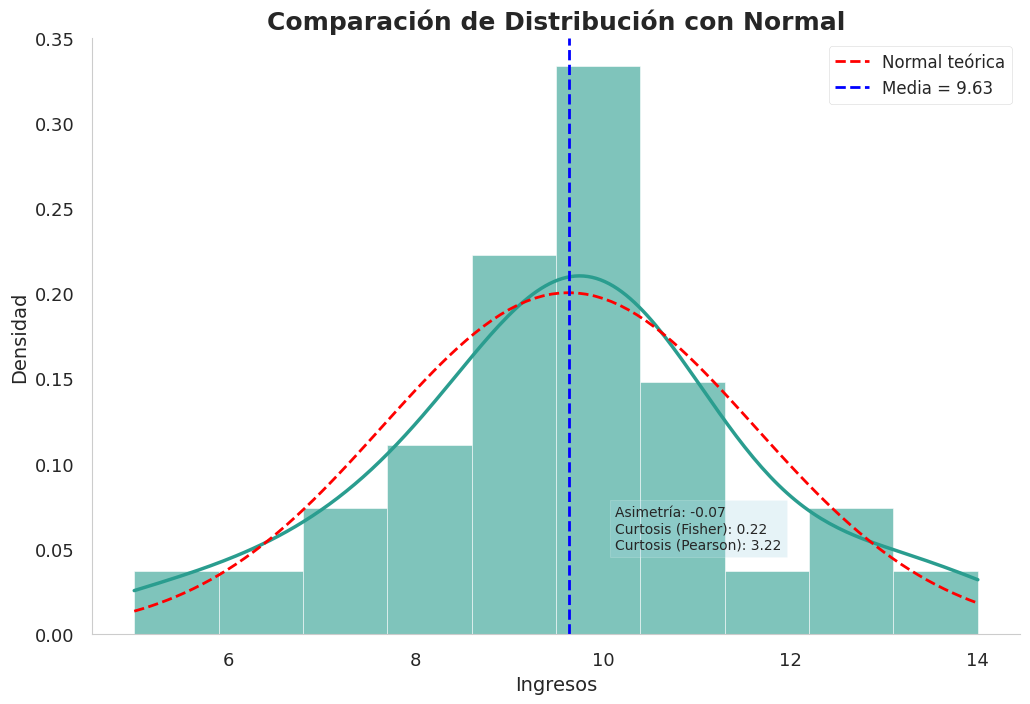

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, norm

# -------------------------------
# Medidas de forma
asimetria = skew(ingresos)
curtosis_val = kurtosis(ingresos)  # Fisher (0 = normal)
curtosis_exceso = kurtosis(ingresos, fisher=False)  # Pearson (3 = normal)

print(f"Asimetría: {asimetria:.3f}")
print(f"Curtosis (Fisher): {curtosis_val:.3f}")
print(f"Curtosis (Pearson): {curtosis_exceso:.3f}")

# -------------------------------
# Histograma + KDE de los datos
sns.histplot(ingresos, bins=10, kde=True, color=color_principal,
             line_kws={'linewidth': 2.5, 'color': color_kde},
             alpha=0.6, stat="density")

# Superposición con la distribución normal
x = np.linspace(minimo, maximo, 100)
pdf_normal = norm.pdf(x, np.mean(ingresos), np.std(ingresos, ddof=1))
plt.plot(x, pdf_normal, 'r--', linewidth=2, label="Normal teórica")

# Líneas de media
plt.axvline(media, color="blue", linestyle="--", linewidth=2, label=f"Media = {media:.2f}")

# Etiquetas y título
plt.title("Comparación de Distribución con Normal", fontsize=18, fontweight='bold')
plt.xlabel("Ingresos", fontsize=14)
plt.ylabel("Densidad", fontsize=14)

# Texto con resultados
texto_forma = (
    f"Asimetría: {asimetria:.2f}\n"
    f"Curtosis (Fisher): {curtosis_val:.2f}\n"
    f"Curtosis (Pearson): {curtosis_exceso:.2f}"
)
plt.text(media+0.5, 0.05, texto_forma, bbox=dict(facecolor='lightblue', alpha=0.3), fontsize=10)

# Leyenda y estilo
plt.legend(fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()


### <span style="color:#2F749F;"><strong>Ejercicio 4: Cálculo de medidas de percentiles</strong></span>

A partir de la muestra generada en el Ejercicio 1, calcula los percentiles de tus datos. Calcula:
1. Percentiles
2. Deciles
3. Cuartiles
4. Grafica los anteriores percentiles calculados, sobre la distribución de tus datos (ver la imagen de ejemplo)

<p align="center">
    <img src="imgs\sp_2_e4.png" alt="sp_2_e4" width="900"  height="400">
</p>


Percentiles:
P10: 7.00
P25: 9.00
P50: 10.00
P75: 10.75
P90: 12.10

Deciles:
D1: 7.00
D2: 8.00
D3: 9.00
D4: 9.00
D5: 10.00
D6: 10.00
D7: 10.00
D8: 11.00
D9: 12.10

Cuartiles:
Q1: 9.00
Q2: 10.00
Q3: 10.75


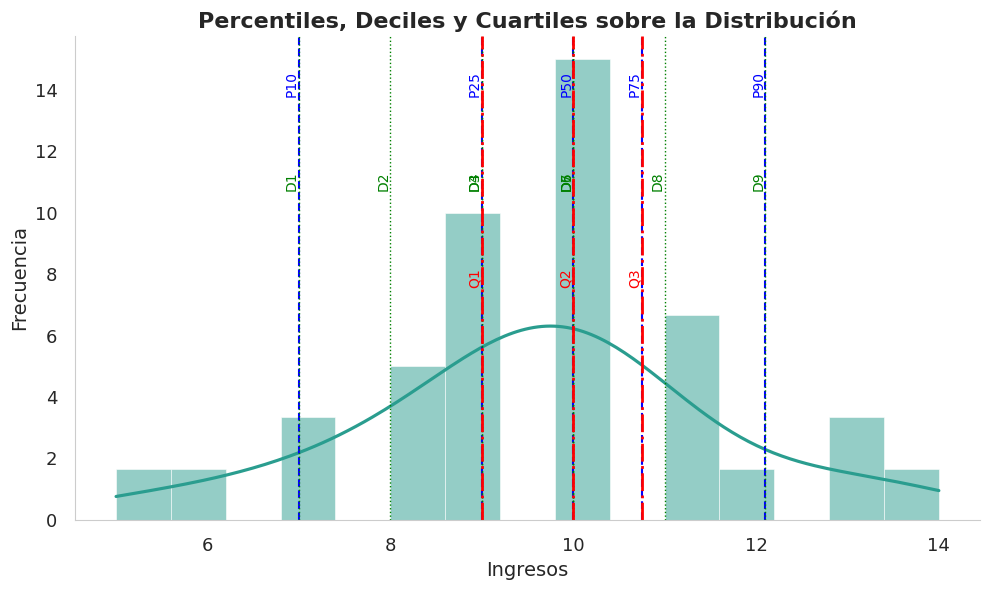

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------
# Cálculo de percentiles, deciles y cuartiles
percentiles = [10, 25, 50, 75, 90]
val_percentiles = np.percentile(ingresos, percentiles)

deciles = np.percentile(ingresos, np.arange(10, 100, 10))  # D1 a D9
cuartiles = np.percentile(ingresos, [25, 50, 75])  # Q1, Q2 (mediana), Q3

print("Percentiles:")
for p, v in zip(percentiles, val_percentiles):
    print(f"P{p}: {v:.2f}")

print("\nDeciles:")
for i, v in enumerate(deciles, 1):
    print(f"D{i}: {v:.2f}")

print("\nCuartiles:")
for i, v in zip([1, 2, 3], cuartiles):
    print(f"Q{i}: {v:.2f}")

# --------------------------
# Gráfica
plt.figure(figsize=(10,6))
sns.histplot(ingresos, bins=15, kde=True, color=color_principal, stat="frequency")

# Graficar percentiles
for p, v in zip(percentiles, val_percentiles):
    plt.axvline(v, color="blue", linestyle="--", linewidth=1.5)
    plt.text(v, plt.ylim()[1]*0.9, f"P{p}", rotation=90, va="center", ha="right", color="blue")

# Graficar deciles
for i, v in enumerate(deciles, 1):
    plt.axvline(v, color="green", linestyle=":", linewidth=1)
    plt.text(v, plt.ylim()[1]*0.7, f"D{i}", rotation=90, va="center", ha="right", color="green")

# Graficar cuartiles
for i, v in zip([1, 2, 3], cuartiles):
    plt.axvline(v, color="red", linestyle="-.", linewidth=2)
    plt.text(v, plt.ylim()[1]*0.5, f"Q{i}", rotation=90, va="center", ha="right", color="red")

# Estilo
plt.title("Percentiles, Deciles y Cuartiles sobre la Distribución", fontsize=16, fontweight="bold")
plt.xlabel("Ingresos", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()


## <span style="color:black;"><strong>Parte 2: Análisis Bivariado</strong></span>

### <span style="color:#2F749F;"><strong>Ejercicio 5: Análisis de correlación</strong></span>

En esta segunda parte, genera **dos variables** a partir de tú número de cédula y realiza un análisis **bivariado** para calcular la relación entre ellas.

1. Use los **6 últimos dígitos** de su cédula como base (similar al Ejercicio 1).  
2. Genere dos variables aleatorias (ejemplo: `ingresos` y `gastos`) con distribución normal, usando esa base como **semilla reproducible**.  
3. Calcule los coeficientes de correlación de **Pearson** y **Spearman**.
4. Grafique las variables analizadas (ver la imagen de ejemplo)
5. Interprete los resultados.  

<p align="center">
    <img src="imgs\sp_2_e5.png" alt="sp_2_e5" width="900"  height="400">
</p>

Coef. Pearson: 0.212
Coef. Spearman: 0.284


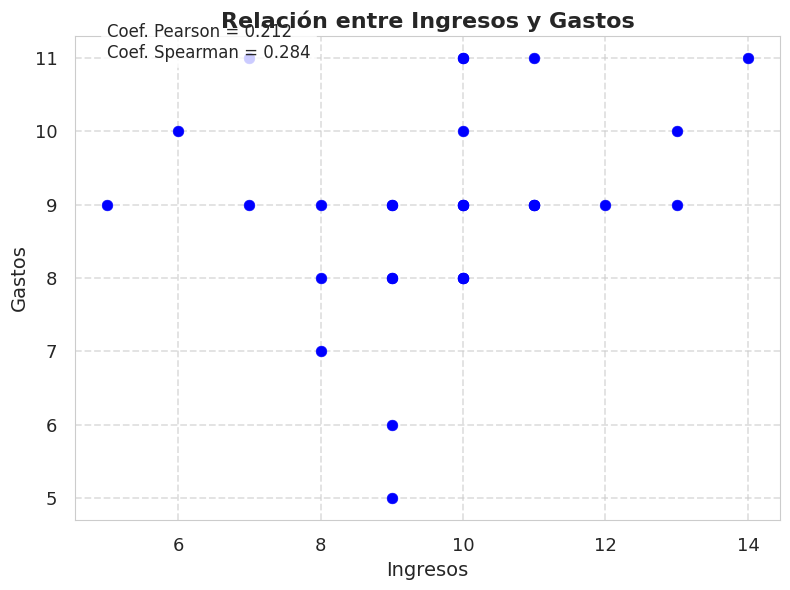

In [13]:
from scipy.stats import pearsonr, spearmanr

# --------------------------
# Base: últimos 6 dígitos de la cédula
base = 118117
np.random.seed(base)  # semilla reproducible

n = 30  # tamaño de la muestra

# Variable 1: Ingresos
ingresos = np.random.normal(loc=base % 10 + 2, scale=2, size=n).round(0)
ingresos = np.clip(ingresos, 0, None)  # evita negativos

# Variable 2: Gastos
gastos = np.random.normal(loc=(base % 7) + 3, scale=1.5, size=n).round(0)
gastos = np.clip(gastos, 0, None)

# --------------------------
# Calcular correlaciones
pearson_corr, _ = pearsonr(ingresos, gastos)
spearman_corr, _ = spearmanr(ingresos, gastos)

print(f"Coef. Pearson: {pearson_corr:.3f}")
print(f"Coef. Spearman: {spearman_corr:.3f}")

# --------------------------
# Gráfica de dispersión
plt.figure(figsize=(8,6))
plt.scatter(ingresos, gastos, color="blue", s=60)

plt.xlabel("Ingresos", fontsize=14)
plt.ylabel("Gastos", fontsize=14)
plt.title("Relación entre Ingresos y Gastos", fontsize=16, fontweight="bold")

# Recuadro con resultados
texto = (
    f"Coef. Pearson = {pearson_corr:.3f}\n"
    f"Coef. Spearman = {spearman_corr:.3f}"
)
plt.text(min(ingresos), max(gastos), texto,
         bbox=dict(facecolor='white', alpha=0.8), fontsize=12)

plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


- Coeficiente de Pearson = 0.212: Indica una relación lineal muy débil y positiva entre ingresos y gastos. Es decir, a mayor ingreso, los gastos tienden a aumentar ligeramente, pero no de forma fuerte ni consistente.

- Coeficiente de Spearman = 0.284: Este mide la relación monótona (no necesariamente lineal). Aquí la correlación también es positiva y un poco más alta que Pearson, pero sigue siendo débil. Esto sugiere que, en general, cuando los ingresos aumentan, los gastos tienden a aumentar también, aunque con muchas excepciones.

- Interpretación visual: El diagrama de dispersión muestra puntos dispersos, sin una tendencia clara ni definida (no se observa una línea marcada de crecimiento). Esto refuerza que la relación es débil.

### <span style="color:#2F749F;"><strong>Ejercicio 6: Chi-Cuadrado</strong></span>

En esta parte, analiza si existe **asociación estadística** entre dos variables categóricas simuladas a partir de tu número de cédula.

1. Usa los **6 últimos dígitos** de tu cédula como base para generar una semilla reproducible.
2. Simula una muestra de **60 personas** con dos variables categóricas:
   - `Nivel educativo`: Básico, Medio, Superior.
   - `Acceso a internet`: Sí, No.
3. Crea una **tabla de contingencia** entre ambas variables.
4. Aplica la **prueba de Chi cuadrado de independencia**.
5. Visualiza la distribución conjunta con un mapa de calor (ver la imagen de con la información de ejemplo).
6. Interpreta el resultado.

<p align="center">
    <img src="imgs\sp_2_e6.png" alt="sp_2_e6" width="900"  height="700">
</p>

Tabla de contingencia:
Acceso a internet  No  Sí
Nivel educativo          
Básico              9  12
Medio               4  15
Superior           10  10

Chi2 = 3.734, gl = 2, p-valor = 0.1546

Valores esperados:
[[ 8.05       12.95      ]
 [ 7.28333333 11.71666667]
 [ 7.66666667 12.33333333]]


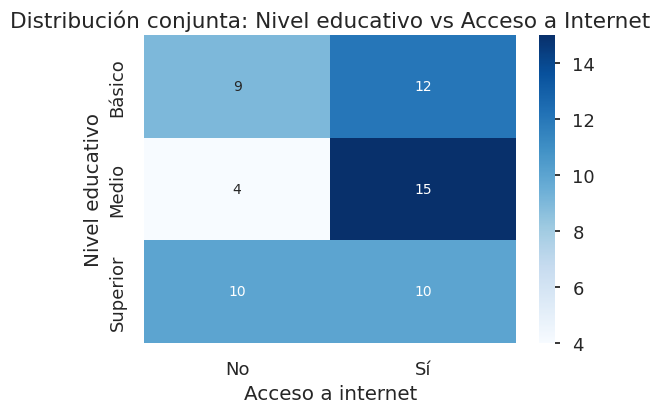

In [17]:
import pandas as pd
from scipy.stats import chi2_contingency

# Semilla reproducible
base = 118117
np.random.seed(base)

# Simulación de 60 personas
n = 60
nivel_educativo = np.random.choice(["Básico", "Medio", "Superior"], size=n, p=[0.3, 0.4, 0.3])
acceso_internet = np.random.choice(["Sí", "No"], size=n, p=[0.7, 0.3])

# Crear DataFrame
df = pd.DataFrame({
    "Nivel educativo": nivel_educativo,
    "Acceso a internet": acceso_internet
})

# Tabla de contingencia
contingencia = pd.crosstab(df["Nivel educativo"], df["Acceso a internet"])
print("Tabla de contingencia:")
print(contingencia)

# Prueba Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingencia)
print(f"\nChi2 = {chi2:.3f}, gl = {dof}, p-valor = {p:.4f}")
print("\nValores esperados:")
print(expected)

# Visualización con mapa de calor
plt.figure(figsize=(6,4))
sns.heatmap(contingencia, color=color_principal, annot=True, fmt="d", cmap="Blues")
plt.title("Distribución conjunta: Nivel educativo vs Acceso a Internet")
plt.show()


## Conclusión.

- Como el p-valor (0.1546) > 0.05, no rechazamos la hipótesis nula.
Esto significa que no hay evidencia estadísticamente significativa de asociación entre nivel educativo y acceso a internet en la muestra simulada.
Es decir, según estos datos, el nivel educativo no parece estar relacionado con tener o no acceso a internet.

Tabla de contingencia muestra, por ejemplo, que en Nivel Medio la mayoría tiene acceso a internet (15 vs 4), mientras que en Nivel Superior está más balanceado (10 vs 10).